In [84]:
!pip install scikit-learn==1.2.2 numpy==1.26.3

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
import joblib
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')

In [85]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/MajorProject 24-25/PeacePulse.csv',
                 names=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen',
                        'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level'], header=0)

# Display the first few rows
df.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [86]:
# Stats of the dataset
print(round(df.describe(), 2))


       snoring_rate  respiration_rate  body_temperature  limb_movement  \
count        630.00            630.00            630.00         630.00   
mean          71.60             21.80             92.80          11.70   
std           19.37              3.97              3.53           4.30   
min           45.00             16.00             85.00           4.00   
25%           52.50             18.50             90.50           8.50   
50%           70.00             21.00             93.00          11.00   
75%           91.25             25.00             95.50          15.75   
max          100.00             30.00             99.00          19.00   

       blood_oxygen  eye_movement  sleeping_hours  heart_rate  stress_level  
count        630.00        630.00          630.00      630.00        630.00  
mean          90.90         88.50            3.70       64.50          2.00  
std            3.90         11.89            3.05        9.92          1.42  
min           82.00  

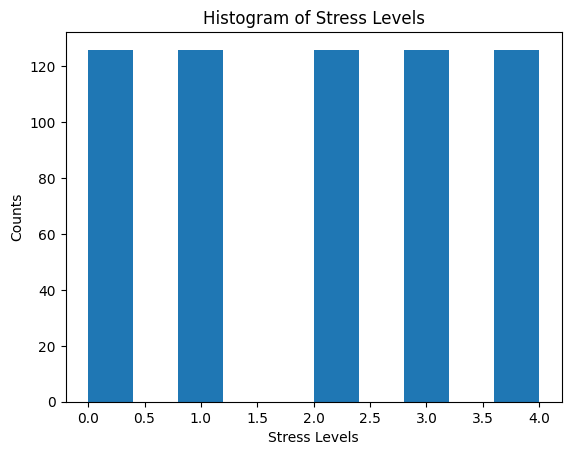

In [87]:
# Histogram of stress levels
plt.hist(df['stress_level'])
plt.title('Histogram of Stress Levels')
plt.xlabel('Stress Levels')
plt.ylabel('Counts')
plt.show()


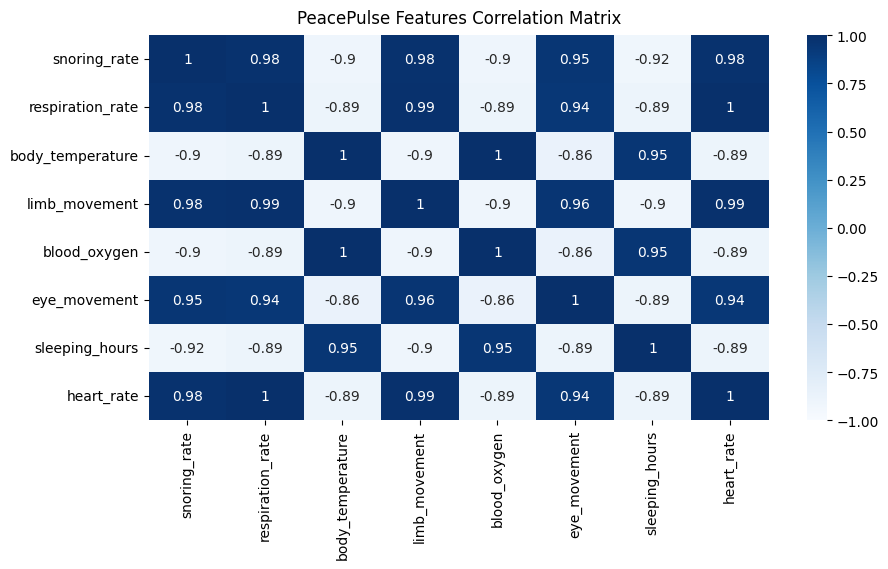

In [88]:
# Correlation matrix on a heatmap
matrix = df.iloc[:, :-1].corr().round(2)
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap="Blues")
plt.title("PeacePulse Features Correlation Matrix", y=1.01)
plt.show()

In [89]:
# Define feature set and target variable
X = df.iloc[:, :-1]  # All features except 'stress_level'
y = df['stress_level']

In [90]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=3)

In [91]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [92]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [93]:
# Create DataFrames for PCA components
pca_df = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])
pca_df['stress_level'] = y_train.reset_index(drop=True)

In [94]:
# Apply LDA
lda = LDA(n_components=2)  # Reduce to 2 components for visualization
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [95]:

# Create DataFrames for LDA components
lda_df = pd.DataFrame(data=X_train_lda, columns=['LD1', 'LD2'])
lda_df['stress_level'] = y_train.reset_index(drop=True)

In [96]:
# Train Random Forest Regressor on PCA components
rf_regressor_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_pca.fit(X_train_pca, y_train)

RandomForestRegressor(random_state=42)

In [97]:
# Evaluate the model
y_pred_rf_pca = rf_regressor_pca.predict(X_test_pca)
SSE_rf_pca = round(sum((y_test - y_pred_rf_pca) ** 2), 2)
acc_score_rf_pca = rf_regressor_pca.score(X_test_pca, y_test)
print(f'Random Forest Model with PCA - Accuracy: {round(acc_score_rf_pca * 100, 2)}% and SSE: {SSE_rf_pca}')

Random Forest Model with PCA - Accuracy: 100.0% and SSE: 0.0


In [98]:
# Train Random Forest Regressor on LDA components
rf_regressor_lda = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_lda.fit(X_train_lda, y_train)

RandomForestRegressor(random_state=42)

In [99]:
# Evaluate the model
y_pred_rf_lda = rf_regressor_lda.predict(X_test_lda)
SSE_rf_lda = round(sum((y_test - y_pred_rf_lda) ** 2), 2)
acc_score_rf_lda = rf_regressor_lda.score(X_test_lda, y_test)
print(f'Random Forest Model with LDA - Accuracy: {round(acc_score_rf_lda * 100, 2)}% and SSE: {SSE_rf_lda}')

Random Forest Model with LDA - Accuracy: 100.0% and SSE: 0.0


In [100]:
# Train Random Forest Regressor on original features
rf_regressor_orig = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_orig.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [101]:
# Evaluate the model
y_pred_rf_orig = rf_regressor_orig.predict(X_test_scaled)
SSE_rf_orig = round(sum((y_test - y_pred_rf_orig) ** 2), 2)
acc_score_rf_orig = rf_regressor_orig.score(X_test_scaled, y_test)
print(f'Random Forest Model with Original Features - Accuracy: {round(acc_score_rf_orig * 100, 2)}% and SSE: {SSE_rf_orig}')

Random Forest Model with Original Features - Accuracy: 99.88% and SSE: 0.56


In [102]:
# Define the prediction function using PCA
def predict_stress_category(features):
    # Standardize the features
    features_scaled = scaler.transform([features])

    # Apply PCA
    features_pca = pca.transform(features_scaled)

    # Predict using Random Forest model trained on PCA components
    stress_percentage = rf_regressor_pca.predict(features_pca)[0]

    # Determine stress category
    if stress_percentage < 33:
        return 'Not Stressed'
    elif stress_percentage < 66:
        return 'Stressed'
    else:
        return 'Over Stressed'


In [103]:
# Example of predicting stress category for new data using PCA
new_features = [0.2, 18, 36.5, 0.1, 98, 0.1, 7, 60]  # Example new data with 8 features
predicted_category = predict_stress_category(new_features)
print(f'Predicted Stress Category for new data using PCA: {predicted_category}')


Predicted Stress Category for new data using PCA: Not Stressed


In [104]:
import os
# Define the path to your folder in Google Drive
folder_path = '/content/drive/MyDrive/MajorProject 24-25'
# Change the current working directory
os.chdir(folder_path)


In [105]:
import joblib

# Save the model
joblib.dump(rf_regressor_orig, 'random_forest_model.pkl')


['random_forest_model.pkl']